# A Simple CNN for Image Classification

In [15]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Normalize pixel values to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [16]:

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [17]:
# Train the model
history=model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 20s 9ms/step - loss: 0.1467 - accuracy: 0.9557 - val_loss: 0.0570 - val_accuracy: 0.9812
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0462 - accuracy: 0.9863 - val_loss: 0.0336 - val_accuracy: 0.9877
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0326 - val_accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0316 - val_accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0236 - val_accuracy: 0.9927


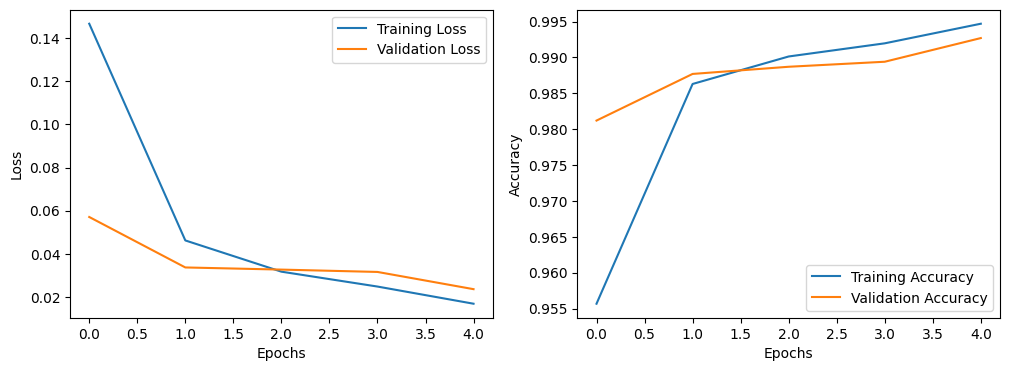

In [18]:

training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
